# AFDB data usage sample

In [2]:
import os
import sys
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append(os.path.abspath(os.path.join('/workspaces/ECG-ML-Challenge/notebooks/', "..")))
from src import dataset
from src import config
from src import plot_ecg

2024-11-08 18:36:29.200 | INFO     | src.config:<module>:8 - PROJ_ROOT path is: /workspaces/ECG-ML-Challenge


## Download afdb

In [8]:
dataset.download_wfdb_dataset('afdb', os.path.join(config.RAW_DATA_DIR, 'afdb'))

2024-11-08 18:18:58.876 | INFO     | src.dataset:download_wfdb_dataset:37 - afdb already exists in /workspaces/ECG-ML-Challenge/data/raw/afdb.


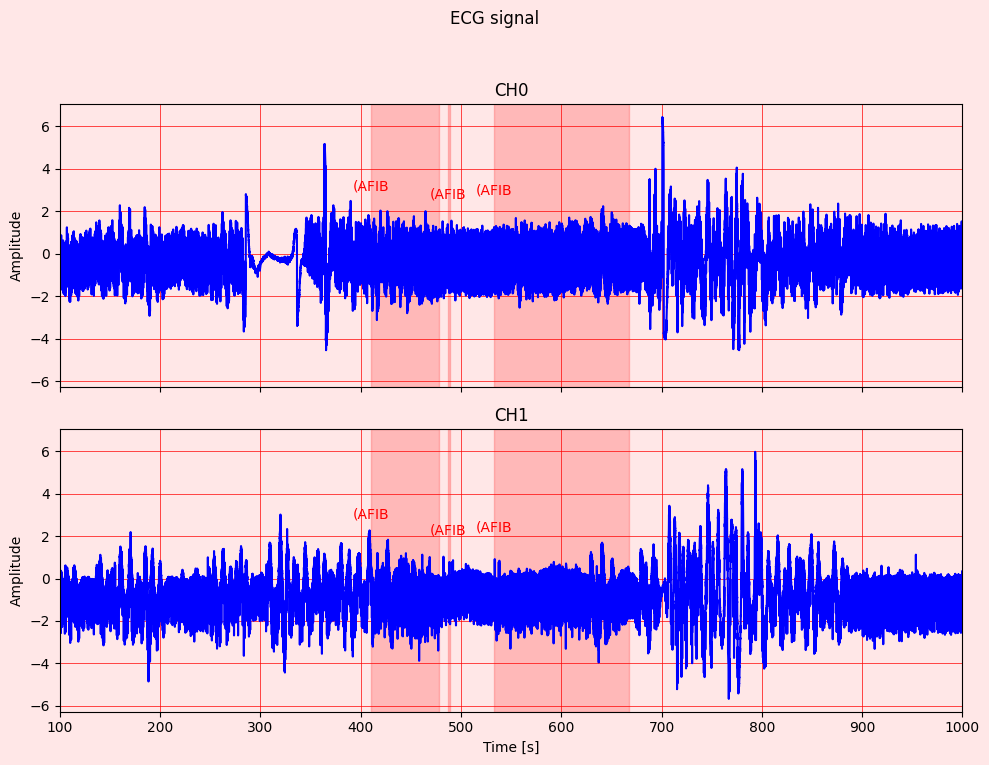

In [9]:
record = wfdb.rdrecord(os.path.join(config.RAW_DATA_DIR, 'afdb', '04015'))
annotation = wfdb.rdann(os.path.join(config.RAW_DATA_DIR, 'afdb', '04015'), 'atr')

_ = plot_ecg(record.p_signal, record.fs, t_start=100, t_end=1000, annotation=annotation)

## View some aux notes

In [10]:
import pandas as pd

pd.DataFrame({'symbol': annotation.symbol, 'sample': annotation.sample, 'description': annotation.aux_note})

,symbol,sample,description
0,+,30,(N
1,+,102584,(AFIB
2,+,119604,(N
3,+,121773,(AFIB
4,+,122194,(N
5,+,133348,(AFIB
6,+,166857,(N
7,+,1096245,(AFIB
8,+,1098054,(N
9,+,1135296,(AFIB


## Calculate some datasset stats

Error reading 00735: sampto must be greater than sampfrom
Error reading 03665: sampto must be greater than sampfrom
Error reading 00735: sampto must be greater than sampfrom
Error reading 03665: sampto must be greater than sampfrom
Error reading 03665: sampto must be greater than sampfrom
Error reading 00735: sampto must be greater than sampfrom


/tmp/ipykernel_36734/3621991434.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(symbols['symbol'], rotation=45)
/tmp/ipykernel_36734/3621991434.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[3].set_xticklabels(aux_notes['aux_note'], rotation=45)


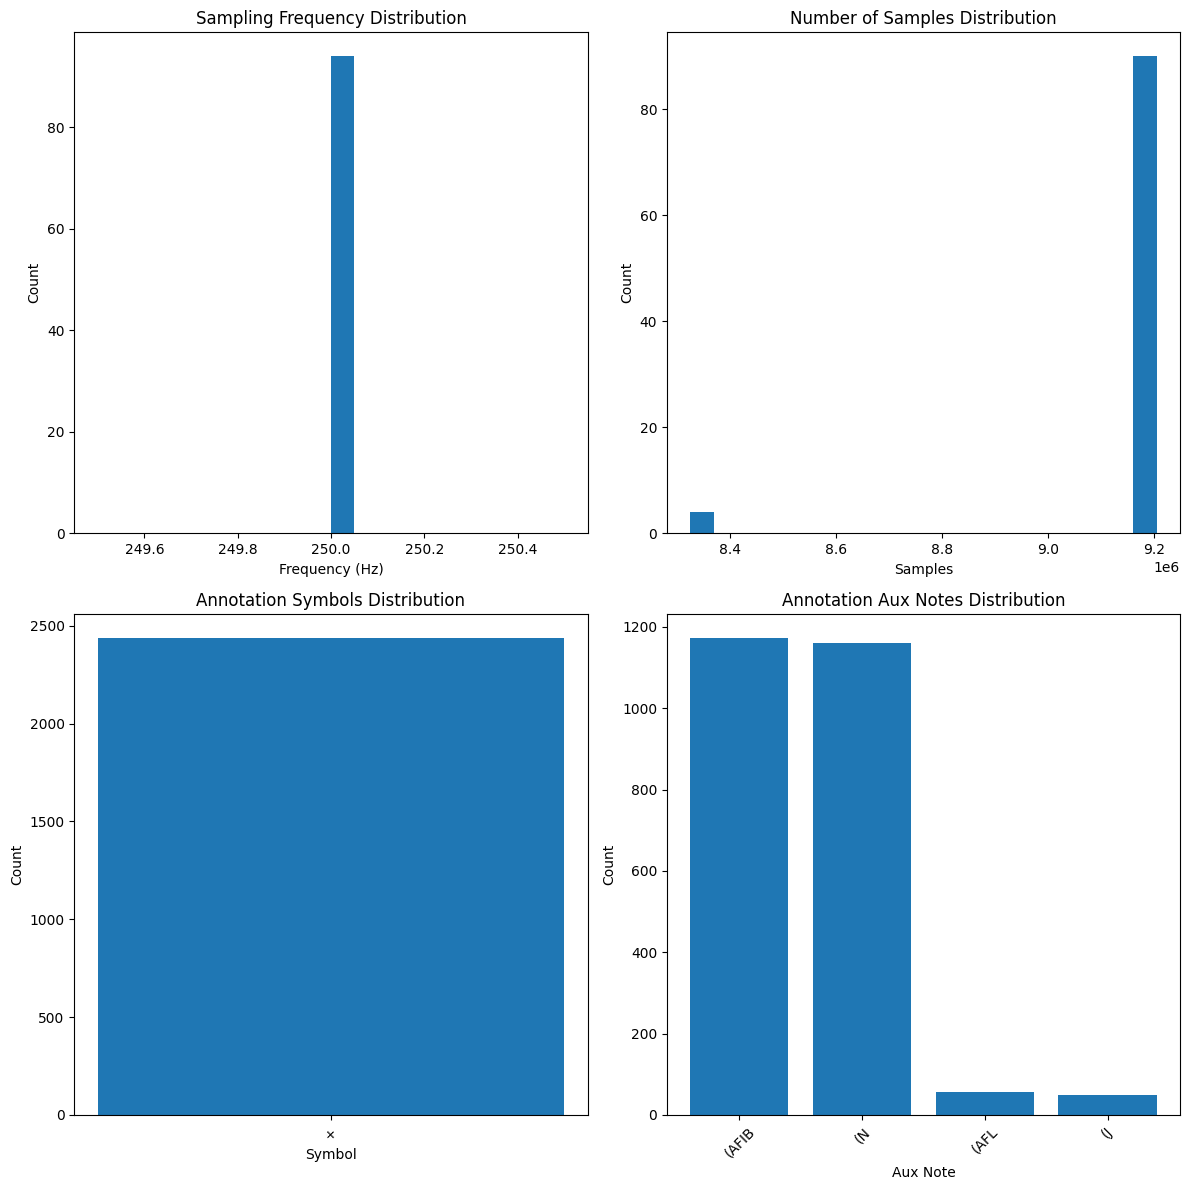

In [21]:
fs = []
samples = []
symbols = {}
aux_notes = {}

files = os.listdir(os.path.join(config.RAW_DATA_DIR, 'afdb'))
files = list(set([f for f in files if f.split('.')[0]]))
for file in files:
    file = file.split('.')[0]
    try:
        record = wfdb.rdrecord(os.path.join(config.RAW_DATA_DIR, 'afdb', file))
        annotation = wfdb.rdann(os.path.join(config.RAW_DATA_DIR, 'afdb', file), 'atr')
    except ValueError as e:
        print(f'Error reading {file}: {e}')
        continue
    
    fs.append(record.fs)
    samples.append(record.p_signal.shape[0])
    for i in range(len(annotation.symbol)):
        symbols[annotation.symbol[i]] = symbols.get(annotation.symbol[i], 0) + 1
        aux_notes[annotation.aux_note[i]] = aux_notes.get(annotation.aux_note[i], 0) + 1

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

axes[0].hist(fs, bins=20)
axes[0].set_title('Sampling Frequency Distribution')
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Count')

axes[1].hist(samples, bins=20)
axes[1].set_title('Number of Samples Distribution')
axes[1].set_xlabel('Samples')
axes[1].set_ylabel('Count')

symbols = pd.DataFrame({'symbol': list(symbols.keys()), 'count': list(symbols.values())})
symbols = symbols.sort_values('count', ascending=False)
axes[2].bar(symbols['symbol'], symbols['count'])
axes[2].set_title('Annotation Symbols Distribution')
axes[2].set_xlabel('Symbol')
axes[2].set_ylabel('Count')
axes[2].set_xticklabels(symbols['symbol'], rotation=45)

aux_notes = pd.DataFrame({'aux_note': list(aux_notes.keys()), 'count': list(aux_notes.values())})
aux_notes = aux_notes.sort_values('count', ascending=False)
axes[3].bar(aux_notes['aux_note'], aux_notes['count'])
axes[3].set_title('Annotation Aux Notes Distribution')
axes[3].set_xlabel('Aux Note')
axes[3].set_ylabel('Count')
axes[3].set_xticklabels(aux_notes['aux_note'], rotation=45)

plt.tight_layout()
plt.show()